In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

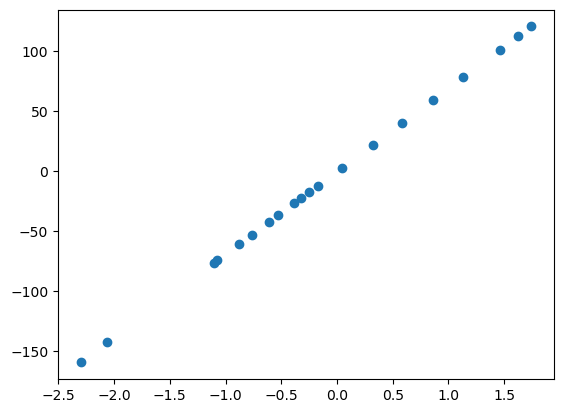

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5 * 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.616463343834714e-18


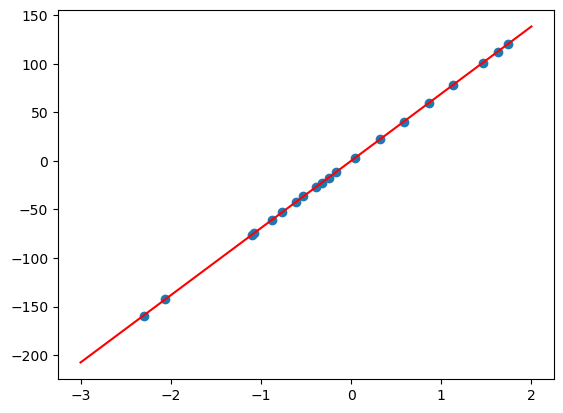

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

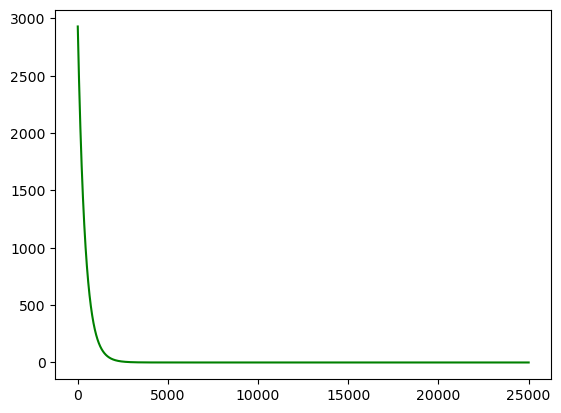

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 1.Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
arr1, arr2 = np.linspace(0, 100, 30), np.linspace(0, 100, 10)
np.random.shuffle(arr1), np.random.shuffle(arr2)

(None, None)

In [ ]:
for bo, b1 in zip(arr1, arr2):
    print(f'b0: {bo}, b1 {b1}')
    hyp = Model()
    hyp.bo = bo
    hyp.b1 = b1
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

b0: 82.75862068965517, b1 66.66666666666666
error after gradient descent: 2.163848866093225e-21
b0: 27.586206896551722, b1 11.11111111111111
error after gradient descent: 1.1389832207184305e-18
b0: 93.10344827586206, b1 88.88888888888889
error after gradient descent: 1.310770826187363e-19
b0: 89.6551724137931, b1 100.0
error after gradient descent: 3.206114536949907e-19
b0: 79.3103448275862, b1 0.0
error after gradient descent: 1.616463343834714e-18
b0: 48.275862068965516, b1 55.55555555555556
error after gradient descent: 6.277282846714496e-20
b0: 96.55172413793103, b1 77.77777777777777
error after gradient descent: 2.492048820403462e-20
b0: 75.86206896551724, b1 33.33333333333333
error after gradient descent: 4.341010916576897e-19
b0: 3.4482758620689653, b1 22.22222222222222
error after gradient descent: 7.448751302436157e-19
b0: 20.689655172413794, b1 44.44444444444444
error after gradient descent: 2.0673180265119897e-19


# 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
for alpha in (np.linspace(0, 1, 30)):
    print(f'alpha: {alpha}')
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

alpha: 0.0
error after gradient descent: 2937.6446095153397
alpha: 0.034482758620689655
error after gradient descent: 1.634229889235268e-26
alpha: 0.06896551724137931
error after gradient descent: 4.297497274895137e-27
alpha: 0.10344827586206896
error after gradient descent: 1.658624426653096e-27
alpha: 0.13793103448275862
error after gradient descent: 9.067167244610309e-28
alpha: 0.1724137931034483
error after gradient descent: 3.7794819007204433e-28
alpha: 0.20689655172413793
error after gradient descent: 3.7794819007204442e-28
alpha: 0.24137931034482757
error after gradient descent: 7.948266658167459e-29
alpha: 0.27586206896551724
error after gradient descent: 7.948266658167459e-29
alpha: 0.3103448275862069
error after gradient descent: 7.948266658167459e-29
alpha: 0.3448275862068966
error after gradient descent: 7.948266658167459e-29
alpha: 0.3793103448275862
error after gradient descent: 7.885157785749778e-29
alpha: 0.41379310344827586
error after gradient descent: 7.9482666581674

# 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit((x, y))
hyp.error(x, y)

2.3101647145272472e-10

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673
5,-0.611756,-42.326026
6,0.319039,22.073585
7,-0.761207,-52.666163
8,0.582815,40.323651
9,-1.099891,-76.098960


In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

2.3101647145272472e-10

In [ ]:
hyp = Model()
steps, errors = hyp.fit((df['x'], df['y']))
hyp.error(x, y)

2.3101647145272472e-10

# 4.Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться


0.0005244076717215663

# 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')

        return steps, errors

In [ ]:
hyp = Model()
hyp.eps = 1e-3
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться


0.47536984815996747

In [ ]:
hyp = Model()
hyp.eps = 1e-9
steps, errors = hyp.fit(df, max_steps=10_000)
hyp.error(x, y)

Модель обучилась успешно. Количество шагов закончилось.


2.776975306057215e-06

# 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')
        return steps, errors

In [ ]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=3)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1.5


6.350669614043344e-10

In [ ]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=1)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1


2.028157137135308e-12

# 7.Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')

        return steps, errors

    def model_plot(self, X=None):
        if X is None:
            X0 = np.linspace(-3, 2, 100)
        else:
            X0 = X
        Y0 = hyp.predict(X0)
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.show()


    def plot_error(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors, 'g')
        plt.show()


In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

Модель перестала обучаться
final alpha: 1


4.1772608368551725e-08

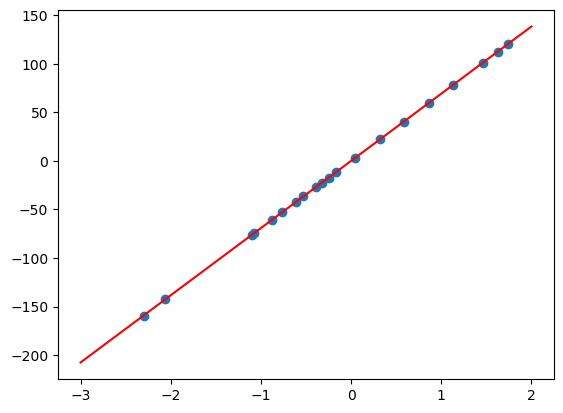

In [ ]:
hyp.model_plot()

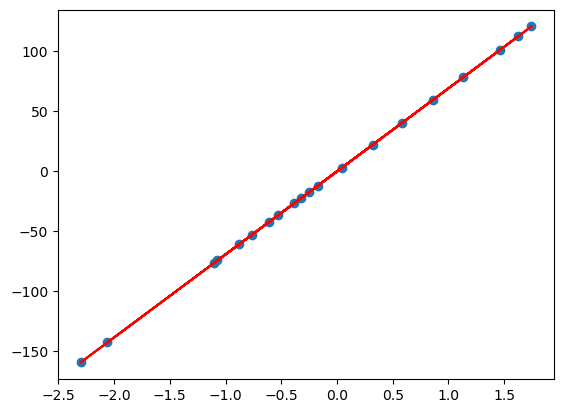

In [ ]:
hyp.model_plot(df['x'])

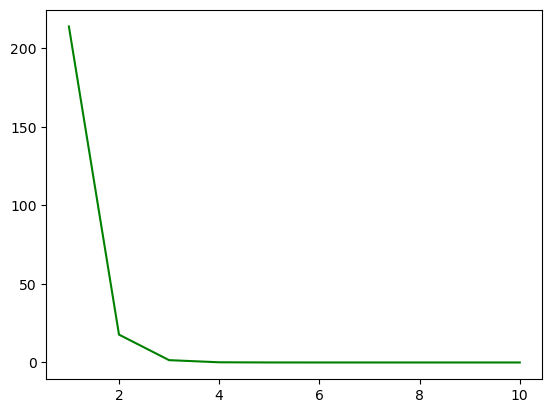

In [ ]:
hyp.plot_error(steps, errors)